In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
import assaytools

In [3]:
from assaytools import platereader

In [4]:
filenames = [
    'p38_Bos_conc0_20180309_183711.xml',
    'p38_Bos_conc1_20180309_185013.xml',
    'p38_Bos_conc2_20180309_190314.xml',
    'p38_Bos_conc3_20180309_191615.xml',
    'p38_Bos_conc4_20180309_192912.xml',
    'p38_Bos_conc5_20180309_194135.xml',
    'p38_Bos_conc6_20180309_195438.xml',
    'p38_Bos_conc7_20180309_200741.xml',
    'p38_Bos_conc8_20180309_202110.xml',
    'p38_Bos_conc9_20180309_203415.xml',
    'p38_Bos_conc10_20180309_204718.xml',
    'p38_Bos_conc11_20180309_210021.xml',
    'p38_Bos_conc12_20180309_211322.xml',
    'p38_Bos_conc13_20180309_212628.xml',
    'p38_Bos_conc14_20180309_213931.xml',
    'p38_Bos_conc15_20180309_215232.xml',
    'p38_Bos_conc16_20180309_220535.xml',
]
datapath = '20180309_ p38_and_boiled_p38_with_Bos_test'

In [5]:
concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06,
         2.48263378e-06,   4.18255821e-06,   7.04646547e-06,
         1.18713651e-05,   2.00000000e-05])

In [6]:
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)

/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


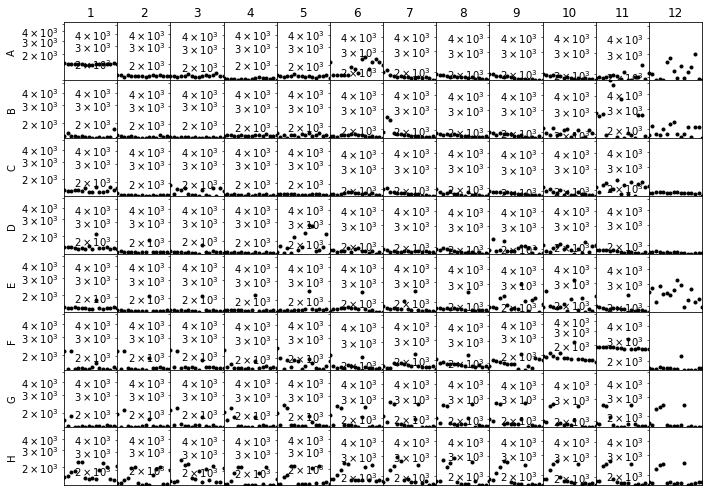

In [7]:
fig = plt.figure(figsize=[10,7])
nrows = 8
ncols = 12
index = 0

label = '280_480_TOP_100'
data = np.zeros([nrows, ncols, nreads], np.float64)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        measurements = [ reads[i][label][well] for i in range(nreads) ]        
        data[row_index,col_index,:] = np.array(measurements)

xmax = concentrations.max()
ymax = data.max().max().max()
        
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        plt.loglog(concentrations, data[row_index,col_index,:], 'k.');
        plt.axis([0, xmax, 0, ymax])
        plt.xticks([]);
        plt.yticks([]);
        if row_index == 0:
            plt.title(col);
        if col_index == 0:
            plt.ylabel(row);
        index += 1
        
plt.tight_layout();
fig.subplots_adjust(wspace=0, hspace=0)